##**Telecom X Challenge**
Se trata de un proyecto para evaluar los conocimientos como asistente de análisis de datos de la empresa "Telecom X", con el proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

#📌 Extracción

###Importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [105]:
# importar librerias y llamar a los datos
import pandas as pd
import json
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

url = 'https://raw.githubusercontent.com/Lsanmart73/Challenger-Telecom-X/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
df = response.json()

In [106]:
telecomx = pd.read_json('https://raw.githubusercontent.com/Lsanmart73/Challenger-Telecom-X/refs/heads/main/TelecomX_Data.json')
telecomx

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [107]:
#genero el dataframe y leo los primeros 5
datos = pd.json_normalize(df, sep='_')
datos.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [108]:
datos.tail()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [109]:
datos.shape

(7267, 21)

In [110]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [111]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [112]:
datos.reset_index(drop=True, inplace=True)
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

Comprender la estructura del dataset y el significado de sus columnas. Esta etapa servirá para identificar qué variables son más relevantes para el análisis de evasión de clientes.

1. Explorar las columnas del dataset y verificar sus tipos de datos
2. Consultar el diccionario para comprender mejor el significado de las variables.
3. Identificar las columnas más relevantes para el análisis de evasión.

In [113]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [114]:
datos['account_Charges_Monthly'] = datos['account_Charges_Monthly'].astype(float)

In [115]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [116]:
datos['account_Charges_Total'].value_counts()

,count
account_Charges_Total,
20.2,11
,11
19.75,9
19.55,9
19.9,9
...,...
1993.2,1
72.1,1
1237.85,1


In [117]:
#Eliminar caracteres especiales
datos['account_Charges_Total'] = datos['account_Charges_Total'].str.replace(',', '').replace('$', '').replace(' ', '').replace('', None)

In [118]:
#Transformar a Float
datos['account_Charges_Total'] = datos['account_Charges_Total'].astype(np.float64)

In [119]:
#Reviso solo los datos account_Charges_Total
datos['account_Charges_Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: account_Charges_Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [120]:
datos['account_Charges_Total'].isna().value_counts()

,count
account_Charges_Total,
False,7256
True,11


In [121]:
total_nulos = datos['account_Charges_Total'].isna()
total_nulos

,account_Charges_Total
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [122]:
datos[total_nulos]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [123]:
#eliminar filas vacias
datos =datos.drop(datos[total_nulos].index, axis=0)

In [124]:
datos = datos.reset_index(drop=True)

In [125]:
datos.value_counts().sum()

np.int64(7256)

In [126]:
datos['account_Charges_Total'].isna().value_counts()

,count
account_Charges_Total,
False,7256


In [127]:
datos.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
672,0956-ACVZC,No,Female,0,No,No,54,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),94.10,5060.90
3178,4450-MDZFX,No,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),74.35,4453.30
1793,2550-ZQZPP,,Male,1,Yes,No,7,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.40,533.05
5597,7662-TWISV,,Female,0,No,Yes,51,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),60.15,3077.00
3532,4881-JVQOD,No,Male,1,Yes,Yes,10,No,No phone service,DSL,...,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),34.55,362.60
5675,7771-CFQRQ,No,Female,0,Yes,Yes,47,Yes,No,DSL,...,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),63.80,3007.25
6069,8311-UEUAB,No,Female,0,Yes,Yes,67,Yes,Yes,DSL,...,No,No,No,Yes,Yes,Two year,Yes,Electronic check,75.50,5229.45
3222,4512-ZUIYL,Yes,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.00,153.05
2476,3466-BYAVD,No,Male,0,Yes,Yes,15,Yes,No,DSL,...,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.40
1328,1925-GMVBW,No,Female,0,No,No,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.55,96.10


In [128]:
datos.nunique()

,0
customerID,7256
Churn,3
customer_gender,2
customer_SeniorCitizen,2
customer_Partner,2
customer_Dependents,2
customer_tenure,72
phone_PhoneService,2
phone_MultipleLines,3
internet_InternetService,3


In [129]:
#Revisar columnas que tienes yes/no
cols_revisar = datos[['Churn','phone_MultipleLines','internet_InternetService','internet_OnlineSecurity','internet_OnlineBackup','internet_DeviceProtection','internet_TechSupport','internet_StreamingTV','internet_StreamingMovies','account_Contract','account_PaymentMethod']]


In [130]:

for col in cols_revisar:
    print(f"\n--- {col} ---")
    print(datos[col].value_counts())


--- Churn ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

--- phone_MultipleLines ---
phone_MultipleLines
No                  3490
Yes                 3061
No phone service     705
Name: count, dtype: int64

--- internet_InternetService ---
internet_InternetService
Fiber optic    3198
DSL            2483
No             1575
Name: count, dtype: int64

--- internet_OnlineSecurity ---
internet_OnlineSecurity
No                     3607
Yes                    2074
No internet service    1575
Name: count, dtype: int64

--- internet_OnlineBackup ---
internet_OnlineBackup
No                     3181
Yes                    2500
No internet service    1575
Name: count, dtype: int64

--- internet_DeviceProtection ---
internet_DeviceProtection
No                     3194
Yes                    2487
No internet service    1575
Name: count, dtype: int64

--- internet_TechSupport ---
internet_TechSupport
No                     3581
Yes                    2100
No internet se

In [131]:
#definir los diccionarios con la información que debe llevar cada fila
mapeos = {
    # Columnas binarias simples Yes/No a 1/0
    'Churn': {'Yes': 1, 'No': 0},
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0},

    # Columnas binarias con categoría especial (No phone/internet service) a 0, Yes a 1
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'internet_OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'internet_OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0}, #
    'internet_DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'internet_TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'internet_StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'internet_StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 0},

    #Columna descriptiva del cliente = gender
    'customer_gender' : {'Female': 1, 'Male': 0}
        }
    #La columna SeniorCitizen ya está en binario.

# Aplico los mapeos usando la herramienta .replace()
datos.replace(mapeos, inplace=True)

<ipython-input-131-c720874b6268>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(mapeos, inplace=True)


In [132]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer_gender            7256 non-null   int64  
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   int64  
 5   customer_Dependents        7256 non-null   int64  
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   int64  
 8   phone_MultipleLines        7256 non-null   int64  
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   int64  
 11  internet_OnlineBackup      7256 non-null   int64  
 12  internet_DeviceProtection  7256 non-null   int64  
 13  internet_TechSupport       7256 non-null   int64

In [133]:
#Revisar churn
datos['Churn'].value_counts()

,count
Churn,
0,5163
1,1869
,224


In [134]:
#Revisar churn vacios
churn_vacio = datos['Churn'].str.strip() == ''
datos[churn_vacio]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
30,0047-ZHDTW,,1,0,0,0,11,1,1,Fiber optic,...,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,0,0,0,0,71,1,0,No,...,0,0,0,0,0,Two year,1,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,0,0,0,0,29,1,0,DSL,...,1,0,1,0,0,One year,1,Electronic check,58.75,1696.20
98,0162-RZGMZ,,1,1,0,0,5,1,0,DSL,...,1,0,1,0,0,Month-to-month,0,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,0,1,1,0,65,1,1,Fiber optic,...,1,1,0,1,1,One year,1,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,9840-GSRFX,,1,0,0,0,14,1,1,DSL,...,1,0,0,0,0,One year,1,Mailed check,54.25,773.20
7169,9872-RZQQB,,1,0,1,0,49,0,0,DSL,...,0,0,0,1,0,Month-to-month,0,Bank transfer (automatic),40.65,2070.75
7200,9920-GNDMB,,0,0,0,0,9,1,1,Fiber optic,...,0,0,0,0,0,Month-to-month,1,Electronic check,76.25,684.85
7228,9955-RVWSC,,1,0,1,1,67,1,0,No,...,0,0,0,0,0,Two year,1,Bank transfer (automatic),19.25,1372.90


In [135]:
print(datos[churn_vacio].nunique())

customerID                   224
Churn                          1
customer_gender                2
customer_SeniorCitizen         2
customer_Partner               2
customer_Dependents            2
customer_tenure               64
phone_PhoneService             2
phone_MultipleLines            2
internet_InternetService       3
internet_OnlineSecurity        2
internet_OnlineBackup          2
internet_DeviceProtection      2
internet_TechSupport           2
internet_StreamingTV           2
internet_StreamingMovies       2
account_Contract               3
account_PaperlessBilling       2
account_PaymentMethod          4
account_Charges_Monthly      188
account_Charges_Total        223
dtype: int64


In [136]:
#Colocar valores 0 en churn vacios
datos.loc[churn_vacio, 'Churn'] = 0

In [137]:
#Cambiar tipo de dato a churn
datos['Churn'] = datos['Churn'].astype(np.int64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   int64  
 2   customer_gender            7256 non-null   int64  
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   int64  
 5   customer_Dependents        7256 non-null   int64  
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   int64  
 8   phone_MultipleLines        7256 non-null   int64  
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   int64  
 11  internet_OnlineBackup      7256 non-null   int64  
 12  internet_DeviceProtection  7256 non-null   int64  
 13  internet_TechSupport       7256 non-null   int64

In [138]:
#Revisar columnas que tienen datos adentro
#Aplico la herramienta get_dummies para dividir las columnas

#internet_InternetService
datos = pd.get_dummies(datos, columns=['internet_InternetService'], prefix=' ', dummy_na=False)

# account_Contract
datos = pd.get_dummies(datos, columns=['account_Contract'], prefix=' ', dummy_na=False)

# account_PaymentMethod
datos = pd.get_dummies(datos, columns=['account_PaymentMethod'], prefix=' ', dummy_na=False)

#compruebo

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   customer_gender              7256 non-null   int64  
 3   customer_SeniorCitizen       7256 non-null   int64  
 4   customer_Partner             7256 non-null   int64  
 5   customer_Dependents          7256 non-null   int64  
 6   customer_tenure              7256 non-null   int64  
 7   phone_PhoneService           7256 non-null   int64  
 8   phone_MultipleLines          7256 non-null   int64  
 9   internet_OnlineSecurity      7256 non-null   int64  
 10  internet_OnlineBackup        7256 non-null   int64  
 11  internet_DeviceProtection    7256 non-null   int64  
 12  internet_TechSupport         7256 non-null   int64  
 13  internet_Streaming

In [139]:
#Las columnas nuevas que se crearon booleanas, las transformaré a tipo entero

for col in datos.columns:
    if datos[col].dtype == bool:
        datos[col] = datos[col].astype(int)

datos.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,...,_DSL,_Fiber optic,_No,_Month-to-month,_One year,_Two year,_Bank transfer (automatic),_Credit card (automatic),_Electronic check,_Mailed check
7253,9992-UJOEL,0,0,0,0,0,2,1,0,0,...,1,0,0,1,0,0,0,0,0,1
6224,8580-AECUZ,1,0,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3887,5327-CNLUQ,0,0,0,1,0,48,1,1,1,...,0,1,0,0,0,1,1,0,0,0
5527,7587-AOVVU,0,0,0,1,1,27,1,1,1,...,0,1,0,1,0,0,0,0,1,0
6133,8404-VIOMB,0,1,0,0,0,66,0,0,1,...,1,0,0,0,0,1,1,0,0,0
3767,5180-UCIIQ,1,0,1,1,1,22,0,0,1,...,1,0,0,1,0,0,0,0,0,1
5189,7101-HRBLJ,0,1,0,1,1,72,1,0,1,...,1,0,0,0,0,1,1,0,0,0
3589,4957-SREEC,0,0,0,1,1,70,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3212,4500-HKANN,0,0,0,1,1,23,1,1,0,...,1,0,0,0,0,1,0,0,0,1
5181,7088-FBAWU,0,1,0,1,1,17,1,0,1,...,1,0,0,1,0,0,0,0,0,1


In [140]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   customer_gender              7256 non-null   int64  
 3   customer_SeniorCitizen       7256 non-null   int64  
 4   customer_Partner             7256 non-null   int64  
 5   customer_Dependents          7256 non-null   int64  
 6   customer_tenure              7256 non-null   int64  
 7   phone_PhoneService           7256 non-null   int64  
 8   phone_MultipleLines          7256 non-null   int64  
 9   internet_OnlineSecurity      7256 non-null   int64  
 10  internet_OnlineBackup        7256 non-null   int64  
 11  internet_DeviceProtection    7256 non-null   int64  
 12  internet_TechSupport         7256 non-null   int64  
 13  internet_Streaming

En este punto ya todos los datos están estandarizados, pero el DF está desordenado. Se organiza, trasladando las columnas de _No, _DSL y _Fiber optic antes de la columna internet_OnlineSecurity y pasaré las columnas account_Charges.Monthtly y account_Charges.Total al final.

In [141]:
# 1. Agrupo las columnas que quieiro mover
col_grupo1 = [' _No', ' _DSL', ' _Fiber optic']
col_grupo2 = ['account_Charges_Monthly', 'account_Charges_Total']

# 2. Obtengo todas las columnas actuales
col_actuales = datos.columns.tolist()

# 3. Inicio la lista del nuevo orden
nuevo_orden = []

#Añado las columnas que van antes de 'OnlineSecurity'
for col in col_actuales:
    if col == 'internet_OnlineSecurity':
        break
    if col not in col_grupo1 + col_grupo2:
         nuevo_orden.append(col)

# Añado las columnas del grupo de internet
for col_internet in col_grupo1:
    if col_internet in datos.columns:
        nuevo_orden.append(col_internet)

#Añado 'OnlineSecurity' y el resto de columnas que van después
if 'internet_OnlineSecurity' in datos.columns:
     nuevo_orden.append('internet_OnlineSecurity')

     indice_referencia = col_actuales.index('internet_OnlineSecurity')
     for col in col_actuales[indice_referencia + 1:]:
         if col not in col_grupo1 + col_grupo2:
             nuevo_orden.append(col)

# 4. Añado las columnas de precios al final
for col_precio in col_grupo2:
    if col_precio in datos.columns:
        nuevo_orden.append(col_precio)


# Verifico
print("\nNuevo orden de columnas:")
print(nuevo_orden)


Nuevo orden de columnas:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', ' _No', ' _DSL', ' _Fiber optic', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', ' _Month-to-month', ' _One year', ' _Two year', ' _Bank transfer (automatic)', ' _Credit card (automatic)', ' _Electronic check', ' _Mailed check', 'account_Charges_Monthly', 'account_Charges_Total']


In [142]:
#Guardar cambios
datos_reorganizado = datos[nuevo_orden].copy()

datos = datos_reorganizado

datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,_No,...,account_PaperlessBilling,_Month-to-month,_One year,_Two year,_Bank transfer (automatic),_Credit card (automatic),_Electronic check,_Mailed check,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,0,...,1,0,1,0,0,0,0,1,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,0,...,0,1,0,0,0,0,0,1,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,0,...,1,1,0,0,0,0,1,0,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,0,...,1,1,0,0,0,0,1,0,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,0,...,1,1,0,0,0,0,0,1,83.9,267.40


In [143]:

#Eliminar columnas irrelevantes.

datos = datos.drop(datos[['customerID',' _No']], axis = 1)
datos.columns.tolist()

['Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 ' _DSL',
 ' _Fiber optic',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_PaperlessBilling',
 ' _Month-to-month',
 ' _One year',
 ' _Two year',
 ' _Bank transfer (automatic)',
 ' _Credit card (automatic)',
 ' _Electronic check',
 ' _Mailed check',
 'account_Charges_Monthly',
 'account_Charges_Total']

In [144]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        7256 non-null   int64  
 1   customer_gender              7256 non-null   int64  
 2   customer_SeniorCitizen       7256 non-null   int64  
 3   customer_Partner             7256 non-null   int64  
 4   customer_Dependents          7256 non-null   int64  
 5   customer_tenure              7256 non-null   int64  
 6   phone_PhoneService           7256 non-null   int64  
 7   phone_MultipleLines          7256 non-null   int64  
 8    _DSL                        7256 non-null   int64  
 9    _Fiber optic                7256 non-null   int64  
 10  internet_OnlineSecurity      7256 non-null   int64  
 11  internet_OnlineBackup        7256 non-null   int64  
 12  internet_DeviceProtection    7256 non-null   int64  
 13  internet_TechSuppo

In [145]:
#Ahora, antes de crear la columna de Cuentas_diarias, se cambiara los nombres de las
#columnas, para que sea más entendible

nombres_nuevos = {
    'Churn': 'Cancelacion',
    'customer_gender': 'Género',
    'customer_SeniorCitizen': 'Jubilado',
    'customer_Partner': 'Pareja',
    'customer_Dependents': 'Dependientes',
    'customer_tenure': 'Meses_contrato',
    'phone_PhoneService': 'Servicio_telefonico',
    'phone_MultipleLines': 'Multiples_lineas',
    ' _Fiber optic' : 'Fibra_optica',
    ' _DSL': 'DSL',
    'internet_OnlineSecurity': 'Seguridad_Ol',
    'internet_OnlineBackup': 'Backup_Ol',
    'internet_DeviceProtection': 'Proteccion_dispositivo',
    'internet_TechSupport': 'Soporte_tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_peliculas',
    ' _Month-to-month': 'Contrato_Mensual',
    ' _One year': 'Contrato_Anual',
    ' _Two year': 'Contrato_Bianual',
    'account_PaperlessBilling': 'Facturacion_electronica',
    'account_Charges_Monthly': 'Cuentas_mensuales',
    'account_Charges_Total': 'Cuentas_totales',
    ' _Bank transfer (automatic)': 'Pago_Trf.Bancaria_Auto',
    ' _Credit card (automatic)': 'Pago_TCredito_Auto',
    ' _Electronic check': 'Pago_ChequeElectronico',
    ' _Mailed check': 'Pago_ChequePorCorreo',
}


In [146]:
#Ahora cambio los nombres con la herramienta .rename

datos.rename(columns=nombres_nuevos, inplace=True)

In [147]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cancelacion              7256 non-null   int64  
 1   Género                   7256 non-null   int64  
 2   Jubilado                 7256 non-null   int64  
 3   Pareja                   7256 non-null   int64  
 4   Dependientes             7256 non-null   int64  
 5   Meses_contrato           7256 non-null   int64  
 6   Servicio_telefonico      7256 non-null   int64  
 7   Multiples_lineas         7256 non-null   int64  
 8   DSL                      7256 non-null   int64  
 9   Fibra_optica             7256 non-null   int64  
 10  Seguridad_Ol             7256 non-null   int64  
 11  Backup_Ol                7256 non-null   int64  
 12  Proteccion_dispositivo   7256 non-null   int64  
 13  Soporte_tecnico          7256 non-null   int64  
 14  Streaming_TV            

In [148]:
#Se creara la columna de Cuentas_diarias
dias_mes = 30
datos['Cuentas_diarias'] = datos['Cuentas_mensuales'] / dias_mes
datos.sample(10)

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,DSL,Fibra_optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Trf.Bancaria_Auto,Pago_TCredito_Auto,Pago_ChequeElectronico,Pago_ChequePorCorreo,Cuentas_mensuales,Cuentas_totales,Cuentas_diarias
6666,0,0,0,1,1,24,1,1,0,0,...,0,0,1,1,0,0,0,24.10,587.40,0.803333
3434,0,0,0,0,0,2,1,0,0,1,...,1,0,0,0,0,1,0,74.75,144.80,2.491667
2843,0,1,1,1,0,42,1,1,0,1,...,1,0,0,0,0,1,0,95.05,3944.50,3.168333
5560,1,1,0,1,0,2,0,0,1,0,...,1,0,0,0,0,1,0,44.60,97.10,1.486667
5340,0,0,0,1,0,30,1,0,0,0,...,0,1,0,0,1,0,0,20.70,587.10,0.690000
929,1,0,0,1,0,21,1,1,0,1,...,1,0,0,0,0,1,0,106.10,2249.95,3.536667
4780,0,0,0,1,1,49,1,1,0,1,...,0,1,0,0,0,1,0,97.95,4917.90,3.265000
726,1,1,0,0,0,41,1,0,0,1,...,1,0,0,1,0,0,0,70.25,2868.05,2.341667
5047,0,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,54.30,54.30,1.810000
1741,0,1,0,0,0,29,1,1,0,1,...,1,0,0,0,1,0,0,76.00,2215.25,2.533333


#📊 Carga y análisis

En esta etapa, el reto es revisar los datos previamente tratados y organizados, para analizar cuál es el motivo de la cancelación de clientes.

In [149]:
#comienzo agrupando los datos Cancelación
cancelaron = datos['Cancelacion'] == 1

no_cancelaron = datos['Cancelacion'] == 0

In [150]:

datos[cancelaron].describe()

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,DSL,Fibra_optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Trf.Bancaria_Auto,Pago_TCredito_Auto,Pago_ChequeElectronico,Pago_ChequePorCorreo,Cuentas_mensuales,Cuentas_totales,Cuentas_diarias
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.502408,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.245586,0.693954,...,0.885500,0.088818,0.025682,0.138042,0.124131,0.573034,0.164794,74.441332,1531.796094,2.481378
std,0.0,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.430549,0.460972,...,0.318502,0.284556,0.158228,0.345036,0.329819,0.494770,0.371094,24.666053,1890.822994,0.822202
min,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,0.628333
25%,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.150000,134.500000,1.871667
50%,1.0,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,79.650000,703.550000,2.655000
75%,1.0,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.350000,8684.800000,3.945000


In [151]:

datos[no_cancelaron].describe()

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,DSL,Fibra_optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Trf.Bancaria_Auto,Pago_TCredito_Auto,Pago_ChequeElectronico,Pago_ChequePorCorreo,Cuentas_mensuales,Cuentas_totales,Cuentas_diarias
count,5387.0,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,...,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000
mean,0.0,0.491554,0.131056,0.527195,0.342306,37.397253,0.900687,0.410433,0.375719,0.352887,...,0.436235,0.250975,0.312790,0.246705,0.247819,0.255058,0.250418,61.394932,2540.440867,2.046498
std,0.0,0.499975,0.337493,0.499306,0.474525,24.144085,0.299110,0.491958,0.484353,0.477912,...,0.495963,0.433614,0.463673,0.431134,0.431786,0.435935,0.433294,31.106744,2330.360507,1.036891
min,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.0,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.100000,568.000000,0.836667
50%,0.0,0.000000,0.000000,1.000000,0.000000,37.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.550000,1669.400000,2.151667
75%,0.0,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,88.700000,4247.825000,2.956667
max,0.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8672.450000,3.958333


Comparativa entre los clientes que cancelaron y los que no cancelaron

<ipython-input-152-6dd4a6756899>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estado', y='Proporción (%)', data=conteo_cancelacion, palette=['skyblue', 'tomato'])


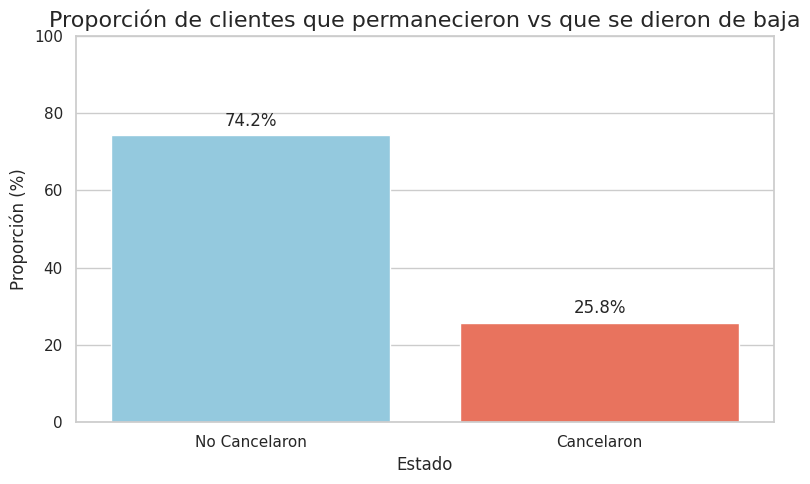

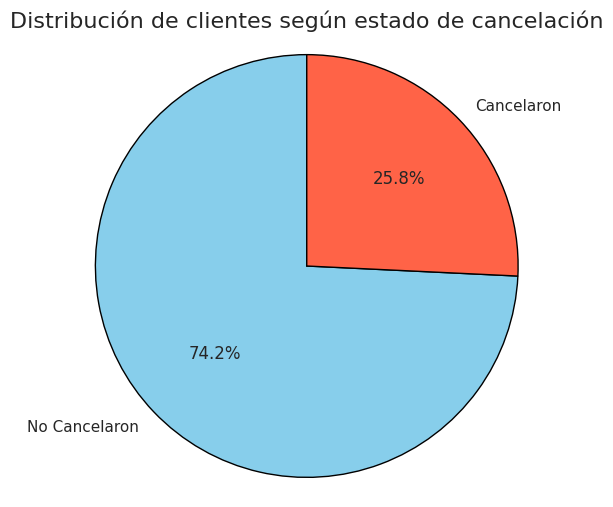

In [152]:

# Calculamos la cantidad de clientes por grupo de cancelación
conteo_cancelacion = datos['Cancelacion'].value_counts().rename({0: 'No Cancelaron', 1: 'Cancelaron'}).reset_index()
conteo_cancelacion.columns = ['Estado', 'Cantidad']

# Calcular proporciones en %
conteo_cancelacion['Proporción (%)'] = (conteo_cancelacion['Cantidad'] / conteo_cancelacion['Cantidad'].sum()) * 100

# Estilo gráfico
sns.set_theme(style="whitegrid")

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Estado', y='Proporción (%)', data=conteo_cancelacion, palette=['skyblue', 'tomato'])
plt.title('Proporción de clientes que permanecieron vs que se dieron de baja', fontsize=16)
plt.ylabel('Proporción (%)')
plt.ylim(0, 100)

# Añadir etiquetas con el porcentaje encima de cada barra
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=4, fontsize=12)

plt.tight_layout()
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'tomato']
plt.pie(
    conteo_cancelacion['Cantidad'],
    labels=conteo_cancelacion['Estado'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribución de clientes según estado de cancelación', fontsize=16)
plt.axis('equal')  # Para que el pie sea un círculo
plt.show()

Comparación de cancelación vs tiempo, gasto mensual y diario

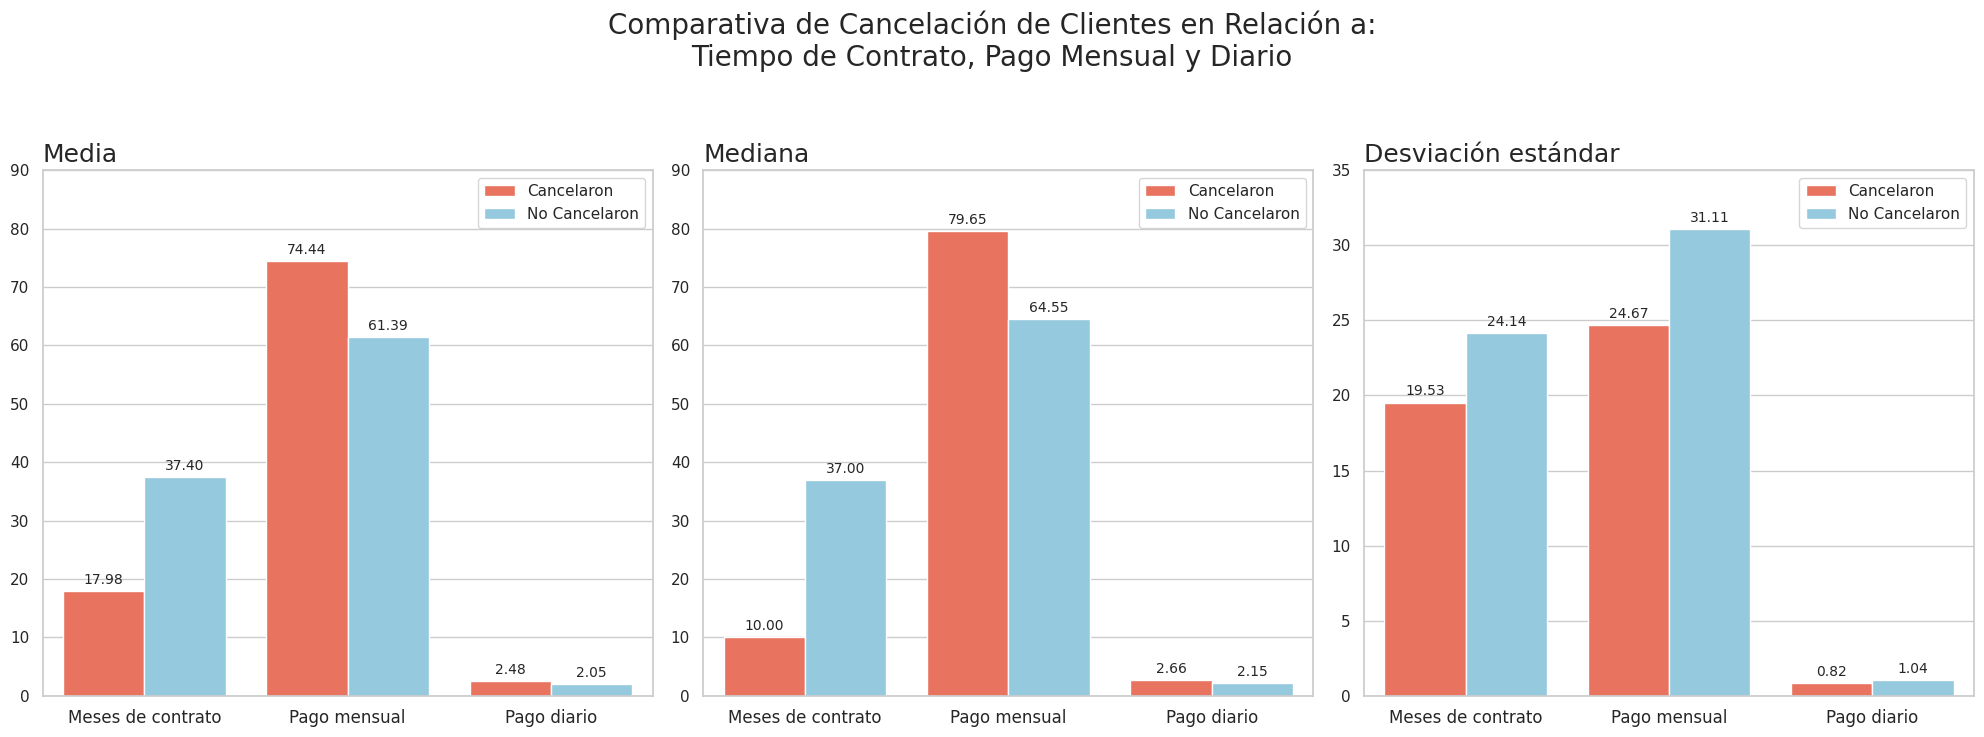

In [153]:
# Configuración de estilo
sns.set_theme(style="whitegrid", font_scale=1.2)
sns.set_context("notebook")

# Variables a analizar
columnas = ['Meses_contrato', 'Cuentas_mensuales', 'Cuentas_diarias']
nombres_columnas = {
    'Meses_contrato': 'Meses de contrato',
    'Cuentas_mensuales': 'Pago mensual',
    'Cuentas_diarias': 'Pago diario'
}

# Función para calcular media, mediana y std
def calcular_estadisticas(df, columnas):
    resumen = []
    for col in columnas:
        for grupo, etiqueta in [(1, 'Cancelaron'), (0, 'No Cancelaron')]:
            datos = df[df['Cancelacion'] == grupo][col]
            resumen.extend([
                ['Media', col, etiqueta, datos.mean()],
                ['Mediana', col, etiqueta, datos.median()],
                ['Desviación estándar', col, etiqueta, datos.std()]
            ])
    return pd.DataFrame(resumen, columns=['Estadística', 'Variable', 'Grupo', 'Valor'])

# Calcular resumen
df_estadisticas = calcular_estadisticas(datos, columnas)

# Preparar figura
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
colores = {'Cancelaron': 'tomato', 'No Cancelaron': 'skyblue'}
estadisticas = ['Media', 'Mediana', 'Desviación estándar']

# Crear gráficos
for i, estadistica in enumerate(estadisticas):
    ax = axes[i]
    datos_plot = df_estadisticas[df_estadisticas['Estadística'] == estadistica].copy()
    datos_plot['Variable'] = datos_plot['Variable'].map(nombres_columnas)

    sns.barplot(data=datos_plot, x='Variable', y='Valor', hue='Grupo', palette=colores, ax=ax)

    ax.set_title(estadistica, fontsize=18, loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=12)
    ax.legend(title='', loc='upper right')

    # Límites del eje Y opcionales
    if estadistica == 'Media' or estadistica == 'Mediana':
        ax.set_ylim(0, 90)
    elif estadistica == 'Desviación estándar':
        ax.set_ylim(0, 35)

    # Etiquetas sobre las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

# Título general
plt.suptitle(
    'Comparativa de Cancelación de Clientes en Relación a:\nTiempo de Contrato, Pago Mensual y Diario',
    fontsize=20, y=1.05
)

plt.tight_layout()
plt.savefig("comparacion_pago_mes_dia_y_tiempo.png", dpi=300, bbox_inches='tight')
plt.show()

Comparativa de cancelación por tipo de servicios

In [154]:

#primero creo una lista con las columnas que quiero comparar
#En este caso, la relativas a servicios
servicios = ['Servicio_telefonico', 'Multiples_lineas', 'DSL', 'Fibra_optica']

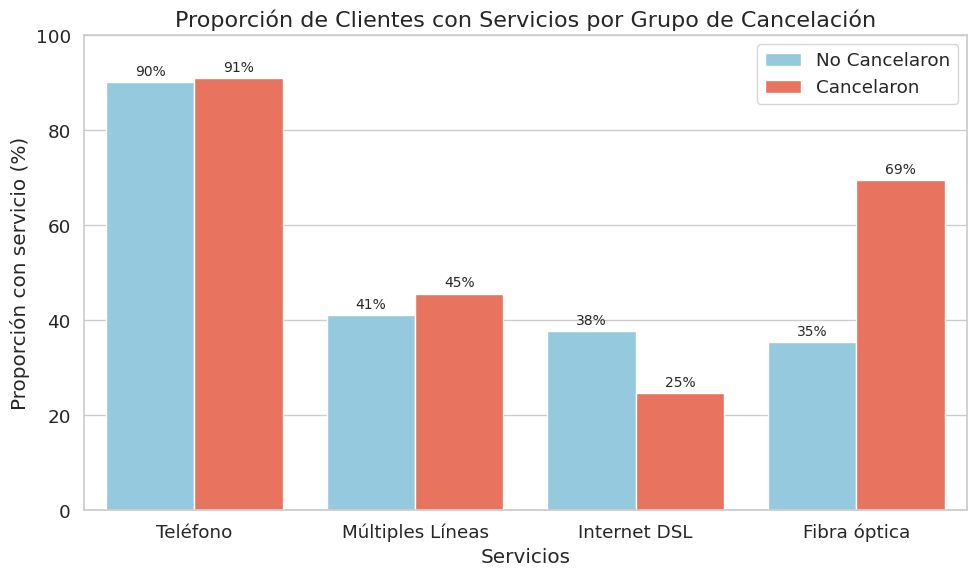

In [155]:
# Configuración de estilo general
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Mapeo de nombres legibles para los servicios
nombres_servicios = {
    'Servicio_telefonico': 'Teléfono',
    'Multiples_lineas': 'Múltiples Líneas',
    'DSL': 'Internet DSL',
    'Fibra_optica': 'Fibra óptica'
}

# Crear DataFrame con proporciones por grupo (Cancelaron / No Cancelaron)
resultados = []

for servicio in servicios:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        grupo_datos = datos[datos['Cancelacion'] == grupo]
        total = len(grupo_datos)
        con_servicio = grupo_datos[servicio].sum()
        proporcion = (con_servicio / total) * 100 if total > 0 else 0

        resultados.append({
            'Servicio': nombres_servicios[servicio],
            'Grupo': 'Cancelaron' if grupo == 1 else 'No Cancelaron',
            'Proporción (%)': proporcion
        })

df_servicios = pd.DataFrame(resultados)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
colores = {'Cancelaron': 'tomato', 'No Cancelaron': 'skyblue'}

sns.barplot(
    data=df_servicios,
    x='Servicio',
    y='Proporción (%)',
    hue='Grupo',
    palette=colores,
    errorbar=None
)

plt.title('Proporción de Clientes con Servicios por Grupo de Cancelación', fontsize=16)
plt.xlabel('Servicios')
plt.ylabel('Proporción con servicio (%)')
plt.ylim(0, 100)

# Mostrar etiquetas de porcentaje sobre cada barra
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3, fontsize=10)

plt.legend(title='', loc='upper right')
plt.tight_layout()
plt.show()


 Servicios adicionales al servicio de internet

In [156]:
servicios_adicionales = ['Seguridad_Ol', 'Backup_Ol', 'Proteccion_dispositivo', 'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas']

nombres_adicionales = {
    'Seguridad_Ol': 'Seguridad Online',
    'Backup_Ol': 'Backup Online',
    'Proteccion_dispositivo': 'Proteccion Dispositivo',
    'Soporte_tecnico': 'Soporte técnico',
    'Streaming_TV': 'Streaming TV',
    'Streaming_peliculas': 'Streaming películas'
       }


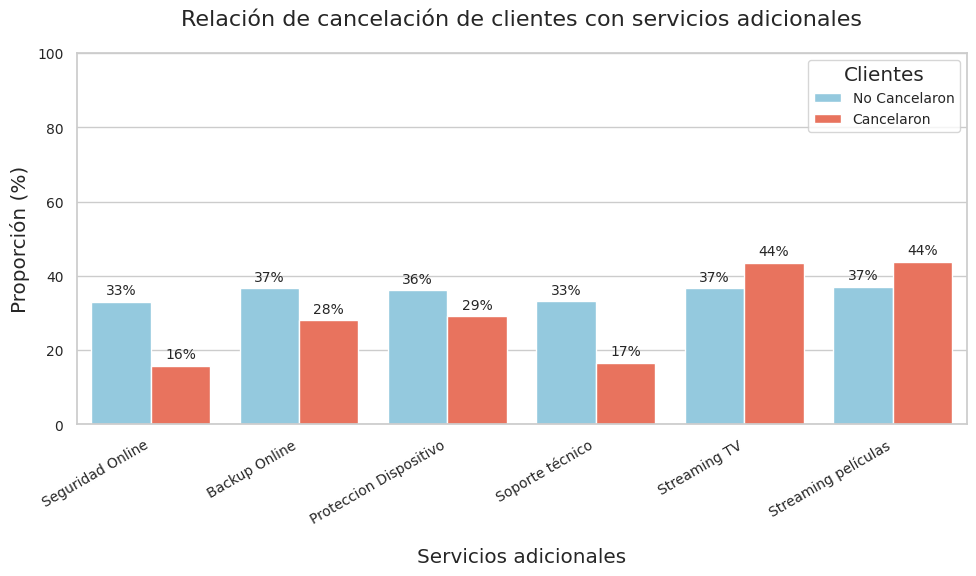

In [157]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Preparar DataFrame con proporciones por grupo (Cancelaron vs No Cancelaron)
resultados_adicionales = []

for servicio in servicios_adicionales:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        datos_grupo = datos[datos['Cancelacion'] == grupo]
        total = len(datos_grupo)
        cantidad_con_servicio = datos_grupo[servicio].sum()
        proporcion = (cantidad_con_servicio / total) * 100 if total > 0 else 0

        resultados_adicionales.append({
            'Servicio Adicional': nombres_adicionales[servicio],
            'Grupo': 'Cancelaron' if grupo == 1 else 'No Cancelaron',
            'Proporción (%)': proporcion
        })

df_servicios_adicionales = pd.DataFrame(resultados_adicionales)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
colores = {'Cancelaron': 'tomato', 'No Cancelaron': 'skyblue'}

sns.barplot(
    data=df_servicios_adicionales,
    x='Servicio Adicional',
    y='Proporción (%)',
    hue='Grupo',
    palette=colores,
    errorbar=None
)

plt.title('Relación de cancelación de clientes con servicios adicionales', fontsize=16, pad=20)
plt.xlabel('Servicios adicionales', labelpad=15)
plt.ylabel('Proporción (%)', labelpad=5)
plt.ylim(0, 100)
plt.legend(title='Clientes', fontsize=10)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir etiquetas con valores porcentuales encima de las barras
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize=10)

plt.tight_layout()
plt.show()


In [158]:
metodo_pago = ['Pago_Trf.Bancaria_Auto', 'Pago_TCredito_Auto', 'Pago_ChequeElectronico', 'Pago_ChequePorCorreo']

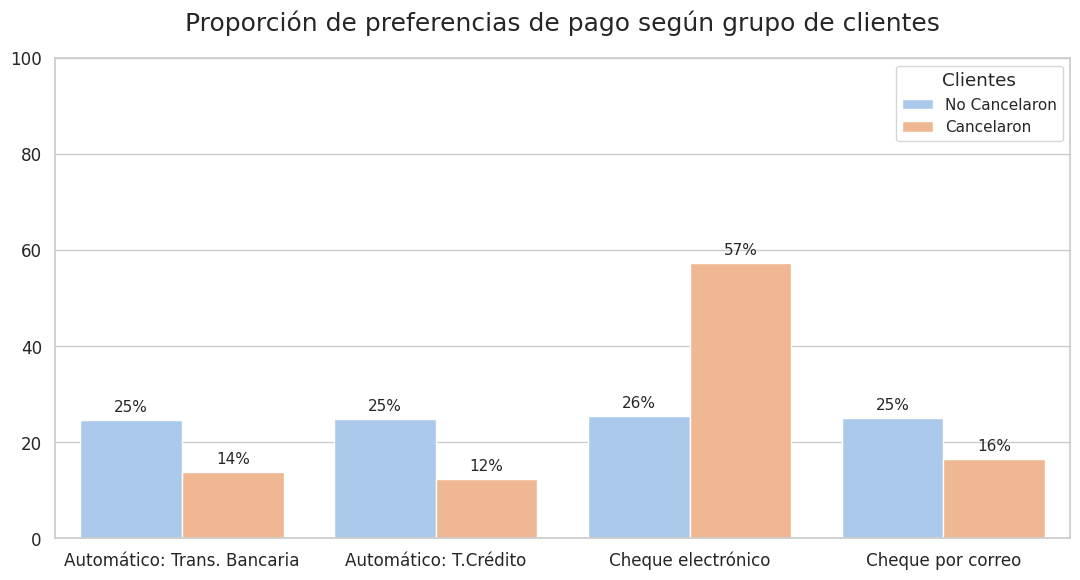

In [159]:
sns.set_theme(style="whitegrid", font_scale=1.1)

# Nombres más legibles para los métodos de pago
nombres_metodos = {
    'Pago_Trf.Bancaria_Auto': 'Automático: Trans. Bancaria',
    'Pago_TCredito_Auto': 'Automático: T.Crédito',
    'Pago_ChequeElectronico': 'Cheque electrónico',
    'Pago_ChequePorCorreo': 'Cheque por correo'
}

# Preparar DataFrame con proporciones por grupo
df_pagos = []

for metodo in metodo_pago:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelacion'] == grupo]
        total = len(subset)
        preferencia_pago = subset[metodo].sum()
        proporcion = (preferencia_pago / total) * 100 if total > 0 else 0  # porcentaje

        df_pagos.append([
            nombres_metodos.get(metodo, metodo),
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_metodo_pago = pd.DataFrame(df_pagos, columns=['Método', 'Grupo', 'Proporción (%)'])

# Gráfico
plt.figure(figsize=(11, 6))

sns.barplot(
    data=df_metodo_pago,
    x='Método',
    y='Proporción (%)',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Proporción de preferencias de pago según grupo de clientes', fontsize=18, pad=20)
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 100)
plt.legend(title='Clientes', fontsize=11, loc='upper right')

# Etiquetas de porcentaje sobre cada barra
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=4, fontsize=11)

plt.tight_layout()
plt.savefig("grafico_metodos_de_pago.png", dpi=300, bbox_inches='tight')
plt.show()


In [160]:
#Tipos de contrato
contratos = ['Contrato_Mensual', 'Contrato_Anual', 'Contrato_Bianual']

#diccionario con nomres de las etiquetas
nombres_contratos = {
    'Contrato_Mensual': 'Contrato mes a mes',
    'Contrato_Anual': 'Contrato a 1 año',
    'Contrato_Bianual': 'Contrato a 2 años',
}

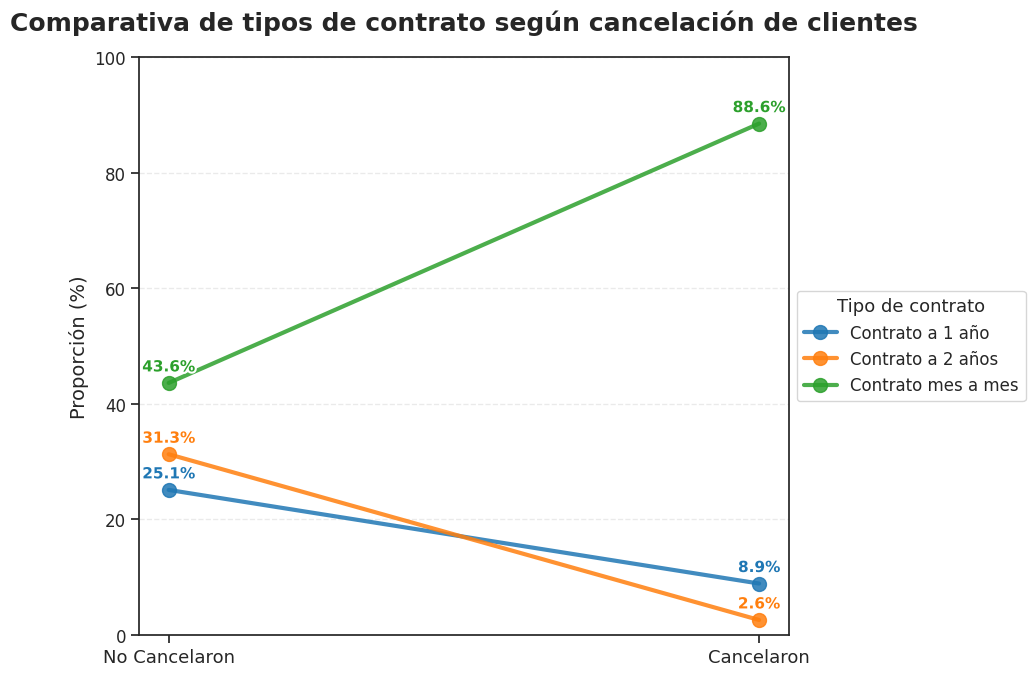

In [161]:
from matplotlib import patheffects  # Import necesario para efectos de texto

sns.set_theme(style="ticks", font_scale=1.2)

# Preparar datos para slope plot
datos_slope = []
for contrato in contratos:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelacion'] == grupo]
        total = len(subset)
        con_contrato = subset[contrato].sum()
        proporcion = (con_contrato / total) * 100 if total > 0 else 0

        datos_slope.append([
            nombres_contratos.get(contrato, contrato),
            'No Cancelaron' if grupo == 0 else 'Cancelaron',
            proporcion
        ])

df_slope = pd.DataFrame(datos_slope, columns=['Contrato', 'Grupo', 'Proporcion'])
pivot = df_slope.pivot(index='Contrato', columns='Grupo', values='Proporcion')

# Paleta de colores armoniosa y distintiva
colores = sns.color_palette("tab10", n_colors=len(pivot))

plt.figure(figsize=(10, 7))

for (contrato, fila), color in zip(pivot.iterrows(), colores):
    plt.plot(
        ['No Cancelaron', 'Cancelaron'],
        [fila['No Cancelaron'], fila['Cancelaron']],
        marker='o',
        markersize=10,
        linewidth=3,
        color=color,
        label=contrato,
        alpha=0.85
    )

    # Etiquetas con sombra para mejor visibilidad
    for grupo in ['No Cancelaron', 'Cancelaron']:
        valor = fila[grupo]
        plt.text(
            grupo, valor + 2, f"{valor:.1f}%",
            ha='center', fontsize=11, weight='bold', color=color,
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )

# Ajustes estéticos
plt.title(
    'Comparativa de tipos de contrato según cancelación de clientes',
    fontsize=18, weight='bold', pad=20
)
plt.ylabel('Proporción (%)', fontsize=14)
plt.ylim(0, 100)
plt.xticks(['No Cancelaron', 'Cancelaron'], fontsize=13)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Leyenda fuera del gráfico para más espacio
plt.legend(
    title='Tipo de contrato',
    fontsize=12,
    title_fontsize=13,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.savefig("grafico_tipo_contrato_elegante.png", dpi=300, bbox_inches='tight')
plt.show()



In [162]:
clientes = ['Género','Jubilado','Dependientes']

# Defino los valores
tipos_clientes = {
      'Género': {0: 'Hombre', 1: 'Mujer'},
      'Jubilado': {0: 'No Jubilado', 1: 'Jubilado'},
    'Dependientes': {0: 'Sin dependientes', 1: 'Con dependientes'}
}

In [163]:
# Agrupo los conteos
datos_clientes = []

for var in clientes:
    nombre_legible = var

    for estado in [0, 1]:
        for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
            subset = datos[(datos[var] == estado) & (datos['Cancelacion'] == grupo)]
            total = len(subset)
            datos_clientes.append([

                f"{var}: {tipos_clientes[var][estado]}",
                'Cancelaron' if grupo == 1 else 'No Cancelaron',
                total
            ])

df_clientes = pd.DataFrame(datos_clientes, columns=['Grupo', 'Estado', 'Cantidad'])

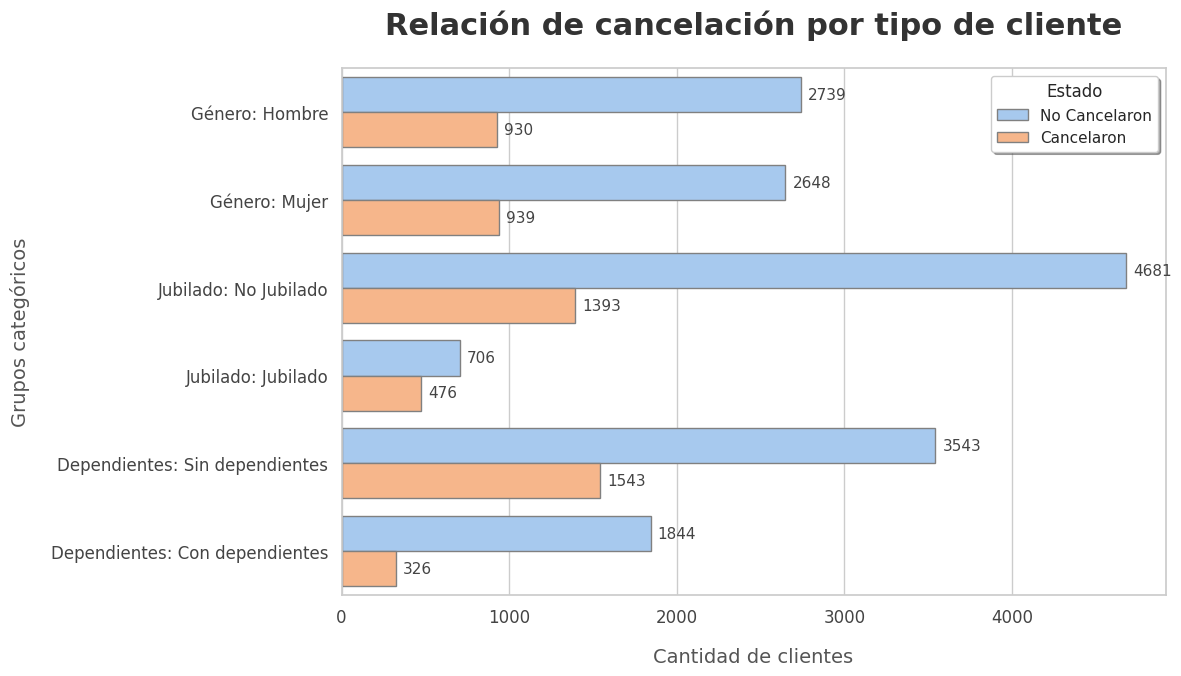

In [164]:
sns.set_theme(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 7))

# Gráfico de barras horizontales con mejor separación y colores pastel suaves
sns.barplot(
    data=df_clientes,
    y='Grupo',
    x='Cantidad',
    hue='Estado',
    palette='pastel',
    edgecolor='gray',
    saturation=0.85
)

plt.title('Relación de cancelación por tipo de cliente', fontsize=22, weight='bold', pad=25, color='#333333')
plt.xlabel('Cantidad de clientes', fontsize=14, color='#555555', labelpad=15)
plt.ylabel('Grupos categóricos', fontsize=14, color='#555555', labelpad=15)
plt.xticks(fontsize=12, color='#444444')
plt.yticks(fontsize=12, color='#444444')

# Leyenda refinada con título
plt.legend(title='Estado', title_fontsize=12, fontsize=11, loc='upper right', frameon=True, shadow=True)

# Añadir valores numéricos encima de las barras para mejor legibilidad
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5, fontsize=11, color='#444444')

plt.tight_layout()
plt.show()



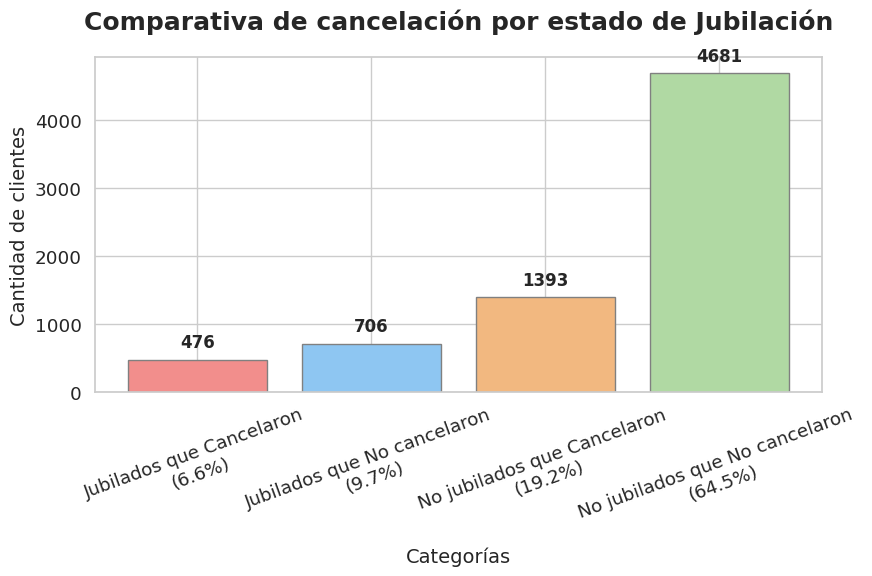

In [165]:
# Datos
etiquetas = [
    'Jubilados que Cancelaron',
    'Jubilados que No cancelaron',
    'No jubilados que Cancelaron',
    'No jubilados que No cancelaron'
]

valores = [
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelacion'] == 1)]),
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelacion'] == 0)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelacion'] == 1)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelacion'] == 0)])
]

# Porcentajes para etiquetas
porcentajes = [v / sum(valores) * 100 for v in valores]
etiquetas_con_porcentaje = [f'{label}\n({p:.1f}%)' for label, p in zip(etiquetas, porcentajes)]

colores = ['#F28E8C', '#8EC6F2', '#F2B880', '#B0D9A3']

# Configurar estilo
sns.set_theme(style="whitegrid", font_scale=1.2)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(9,6))

# Gráfico de barras verticales
bars = ax.bar(etiquetas_con_porcentaje, valores, color=colores, edgecolor='gray')

# Añadir etiquetas con valores sobre cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 6),  # Desplazamiento hacia arriba
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=12,
                fontweight='bold')

# Títulos y etiquetas
ax.set_title('Comparativa de cancelación por estado de Jubilación', fontsize=18, weight='bold', pad=20)
ax.set_ylabel('Cantidad de clientes', fontsize=14)
ax.set_xlabel('Categorías', fontsize=14)
ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


#📄Informe final

📊 Informe Final: Análisis de Evasión de Clientes (Churn) en TelecomX
🔹 Introducción
Este informe tiene como objetivo analizar el fenómeno de la evasión de clientes (churn) en la empresa de telecomunicaciones TelecomX. La pérdida de clientes representa un reto significativo, ya que no solo reduce ingresos, sino que también incrementa los costos de adquisición de nuevos usuarios. A través de este estudio, buscamos identificar los factores clave que influyen en la decisión de los clientes de abandonar el servicio, y así diseñar estrategias eficaces para reducir la tasa de evasión y mejorar la retención.

🔹 Limpieza y Preparación de los Datos
El análisis comenzó con la carga y tratamiento del conjunto de datos TelecomX_Data.csv mediante la librería pandas. Las principales etapas del preprocesamiento fueron:

Carga de datos: Se importó .json desde url y se dejo en un DataFrame.

Verificación de tipos de datos: Se validaron los tipos de datos para detectar inconsistencias.

Tratamiento de valores nulos: La variable cuenta_cargos_total contenía espacios vacíos que fueron convertidos en NaN y luego transformados a tipo float64.

Generación de variables derivadas: Se creó la columna cuentas_diarias, calculando el gasto promedio diario dividiendo los cargos totales por el tiempo de permanencia.

Renombrado de columnas: Se tradujeron y estandarizaron los nombres de columnas al español para facilitar la comprensión.

🔹 Análisis Exploratorio de Datos (EDA)
Se realizaron múltiples análisis y visualizaciones para comprender el comportamiento de los clientes y su relación con el churn:

🔸 Distribución de Cancelaciones
Se observó una proporción considerable de clientes que cancelaron el servicio.

Las gráficas de pastel y barras permitieron visualizar de forma clara esta distribución.

🔸 Comparacion de medios de pago
Método de pago: Se detectó una mayor evasión entre los clientes que utilizan cheque electrónico como método de pago, lo que podría reflejar una experiencia negativa o una menor fidelización.

🔸 Tipo de Contrato
El contrato mensual tiene una correlación positiva con la cancelación, mientras que los contratos anuales o bianuales se asocian a mayor permanencia..

🔸 Cuentas Totales y Tiempo de Permanencia
Los clientes que cancelan suelen gastar menos y llevar menos tiempo en la compañía.

🔸 Tiempo de permanencia comparado con los gastos mensuales y diarios
Los clientes que abandonan el servicio suelen pagar más al mes y llevar menos tiempo en la compañía, esto sugiere que, aunque no cancelan inmediatamente, los usuarios con tarifas elevadas y poca fidelización terminan abandonando el servicio en menos de un año.

🔸 Tipos de servicio
Se percibe que los clientes que cancelan suelen tener el servicio de Internet con Fibra óptica

🔹 Conclusiones y Principales Hallazgos
A partir del análisis se identificaron los siguientes puntos clave:

Tasa significativa de churn, que exige atención inmediata.

Contratos mensuales asociados a mayor propensión de evasión.

Mayor churn en clientes recientes y con gastos mensuales elevados.

Métodos de pago electrónicos, especialmente cheque electrónico, correlacionados con menor retención.

Estos hallazgos indican que la duración del contrato, la experiencia del cliente al inicio del servicio y el costo percibido son factores decisivos en la permanencia del cliente.

🔹 Recomendaciones Estratégicas
Con base en los insights obtenidos, se proponen las siguientes acciones:

✅Fidelización de contratos mensuales
Crear campañas de retención específicas para clientes con contratos mes a mes, incentivando el cambio a contratos más largos (descuentos, beneficios exclusivos, etc.).

✅Onboarding proactivo de nuevos clientes
Diseñar un programa de bienvenida y seguimiento durante los primeros meses del cliente, incluyendo soporte personalizado y encuestas de satisfacción.

✅Análisis profundo del segmento de alto gasto mensual
Investigar causas de insatisfacción entre clientes con altos cargos mensuales y reforzar la percepción de valor del servicio.

✅Optimización de métodos de pago electrónicos
Evaluar la experiencia del cliente en el uso de métodos electrónicos. Mejorar la usabilidad, seguridad y transparencia de estos sistemas.

✅Modelos predictivos de churn
Implementar modelos de machine learning que permitan anticipar la evasión y activar intervenciones automatizadas para prevenirla.

✅Encuestas de salida
Establecer un sistema para recopilar retroalimentación directa de los clientes que cancelan. Esto permitirá identificar causas específicas y ajustar estrategias en tiempo real.

🔹 Conclusión
El análisis evidencia que la evasión de clientes en TelecomX no es aleatoria, sino que responde a patrones detectables y abordables. Al implementar las estrategias recomendadas, basadas en evidencia, la empresa podrá mejorar sustancialmente la retención, optimizar sus procesos de atención y consolidar una relación duradera con sus usuarios.

Una gestión de churn efectiva no solo reduce pérdidas, sino que también fortalece la marca y la percepción del cliente, elementos clave para un crecimiento sostenible.